<a href="https://colab.research.google.com/github/nstaudac/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Nicholas_Staudacher_LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=180.18849314523848, mobile=False), User(purchased=True, time_on_site=135.67700482149365, mobile=False), User(purchased=True, time_on_site=159.88535379510446, mobile=True), User(purchased=True, time_on_site=257.7835981679507, mobile=True), User(purchased=False, time_on_site=86.99445445027507, mobile=False), User(purchased=False, time_on_site=173.67358829592212, mobile=True), User(purchased=True, time_on_site=44.968058188901246, mobile=True), User(purchased=False, time_on_site=30.15219480121866, mobile=True), User(purchased=False, time_on_site=460.0007745853941, mobile=False), User(purchased=False, time_on_site=122.22911474525455, mobile=True)]


In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,180.188493,False
1,True,135.677005,False
2,True,159.885354,True
3,True,257.783598,True
4,False,86.994454,False


In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.395806383057993,5.457727420381445,6.012980358659168,6.370819673044487,6.526220869482321,6.618506115477453,6.744300972093091,6.937814523764514,7.022230321283178,7.738183255456649,...,570.7205763776294,572.579212329361,573.071762294419,577.5607756708825,578.0265919014007,578.8349054472059,584.0914381586123,586.960469433746,588.7975083689481,599.8083961016524
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,0,1,1
True,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,0


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.801, 124.278]","(124.278, 243.161]","(243.161, 362.043]","(362.043, 480.926]","(480.926, 599.808]"
purchased,,,,,
False,240,233,105,29,28
True,96,131,102,20,16


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.801, 124.278]","(124.278, 243.161]","(243.161, 362.043]","(362.043, 480.926]","(480.926, 599.808]"
purchased,,,,,
False,0.714286,0.64011,0.507246,0.591837,0.636364
True,0.285714,0.35989,0.492754,0.408163,0.363636


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.672,0.622667
True,0.328,0.377333


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [89]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

persons_data_url = 'https://github.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module3-databackedassertions/persons.csv'
!curl https://github.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/raw/master/module3-databackedassertions/persons.csv

<html><body>You are being <a href="https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv">redirected</a>.</body></html>

In [90]:
# importing pandas and reading csv file
import pandas as pd
persons_data = pd.read_csv(persons_data_url)
persons_data.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
#retrograde installation of pandas to fix error code
!pip freeze

In [57]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.1MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [91]:
# crosstabulation to try to see what's going on
pd.crosstab(persons_data['weight'], persons_data['exercise_time'])

exercise_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0


In [92]:
#binning exercise time and creating crosstab of exercise time and weight#
time_bins = pd.cut(persons_data['exercise_time'], 6)  # 6 equal-sized bins
pd.crosstab(persons_data['weight'], time_bins)

exercise_time,"(-0.3, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]"
weight,,,,,,
100,4,2,0,2,3,4
101,0,1,1,4,2,2
102,1,2,2,1,4,3
103,1,2,0,2,0,3
104,2,2,1,0,3,1
105,3,0,0,3,1,3
106,0,1,2,3,0,2
107,0,1,3,3,2,2
108,0,3,3,3,5,5


In [93]:
#normalizing (getting %) crosstab data
pd.crosstab(persons_data['weight'], time_bins, normalize='columns')

exercise_time,"(-0.3, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]"
weight,,,,,,
100,0.016598,0.007576,0.000000,0.010526,0.019355,0.025641
101,0.000000,0.003788,0.005155,0.021053,0.012903,0.012821
102,0.004149,0.007576,0.010309,0.005263,0.025806,0.019231
103,0.004149,0.007576,0.000000,0.010526,0.000000,0.019231
104,0.008299,0.007576,0.005155,0.000000,0.019355,0.006410
105,0.012448,0.000000,0.000000,0.015789,0.006452,0.019231
106,0.000000,0.003788,0.010309,0.015789,0.000000,0.012821
107,0.000000,0.003788,0.015464,0.015789,0.012903,0.012821
108,0.000000,0.011364,0.015464,0.015789,0.032258,0.032051


In [94]:
# binning weight and creating crosstab with weight and exercise time
weight_bins = pd.cut(persons_data['weight'], 6)
pd.crosstab(time_bins, weight_bins, normalize='columns')


weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
exercise_time,,,,,,
"(-0.3, 50.0]",0.115646,0.121711,0.146245,0.279762,0.366197,0.871795
"(50.0, 100.0]",0.142857,0.154605,0.249012,0.267857,0.436620,0.128205
"(100.0, 150.0]",0.173469,0.088816,0.193676,0.244048,0.183099,0.000000
"(150.0, 200.0]",0.173469,0.203947,0.173913,0.184524,0.014085,0.000000
"(200.0, 250.0]",0.156463,0.207237,0.166008,0.023810,0.000000,0.000000
"(250.0, 300.0]",0.238095,0.223684,0.071146,0.000000,0.000000,0.000000


In [95]:
# binning age and creating crosstab of all three variables

age_bins = pd.cut(persons_data['age'], 6)
persons_crosstab = pd.crosstab(age_bins, [weight_bins, time_bins], normalize='index')
persons_crosstab

weight           (99.854, 124.333]       ...        (221.667, 246.0]
exercise_time         (-0.3, 50.0]       ...           (50.0, 100.0]
age                                      ...                        
(17.938, 28.333]          0.019139       ...                0.000000
(28.333, 38.667]          0.032258       ...                0.000000
(38.667, 49.0]            0.010000       ...                0.000000
(49.0, 59.333]            0.032609       ...                0.000000
(59.333, 69.667]          0.020833       ...                0.000000
(69.667, 80.0]            0.055556       ...                0.025253

[6 rows x 29 columns]

In [0]:
# import matplotlib and create bar plot for crosstab data
import matplotlib.pyplot as plt




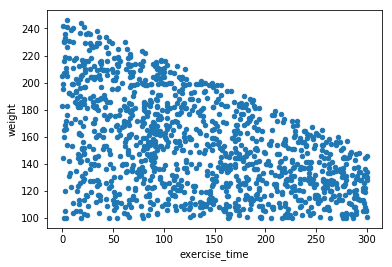

In [109]:
# scatter plot of weight against exercise time
persons_data.plot.scatter('exercise_time', 'weight');

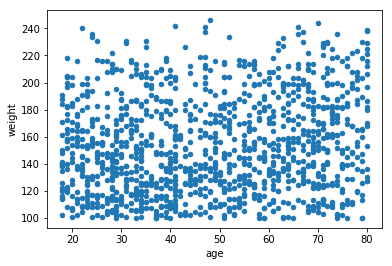

In [110]:
# scatter plot of weight against exercise time
persons_data.plot.scatter('age', 'weight');

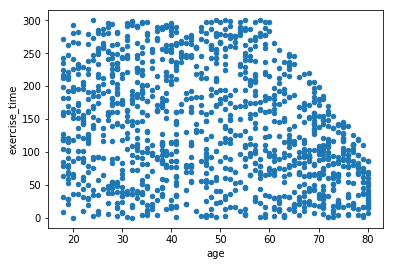

In [111]:
# scatter plot of weight against exercise time
persons_data.plot.scatter('age', 'exercise_time');

In [97]:
#pivot table for examining weight against exercise time
pt = pd.pivot_table(persons_data, values='weight', index=time_bins)
pt

,weight
exercise_time,
"(-0.3, 50.0]",175.933610
"(50.0, 100.0]",165.208333
"(100.0, 150.0]",155.139175
"(150.0, 200.0]",143.852632
"(200.0, 250.0]",135.432258
"(250.0, 300.0]",127.006410


In [98]:
#pivot table for examining weight against exercise age
pt2 = pd.pivot_table(persons_data, values='weight', index=age_bins)
pt2

,weight
age,
"(17.938, 28.333]",150.215311
"(28.333, 38.667]",148.271889
"(38.667, 49.0]",149.855000
"(49.0, 59.333]",150.211957
"(59.333, 69.667]",160.588542
"(69.667, 80.0]",162.808081


In [102]:
#pivot table for examining age against exercise time
pt3 = pd.pivot_table(persons_data, values='age', index=time_bins)
pt3

,age
exercise_time,
"(-0.3, 50.0]",52.970954
"(50.0, 100.0]",54.034091
"(100.0, 150.0]",50.788660
"(150.0, 200.0]",44.010526
"(200.0, 250.0]",40.754839
"(250.0, 300.0]",41.750000


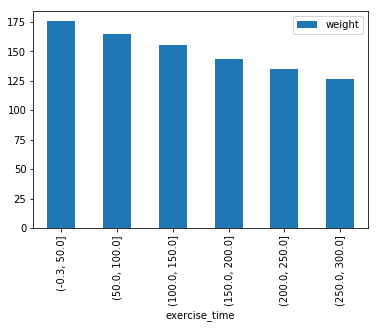

In [100]:
#bar plot table for examining exercise time against weight
pt.plot.bar()

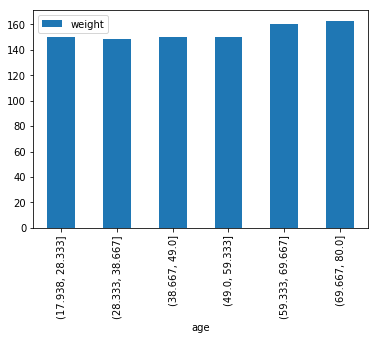

In [101]:
#bar plot table for examining age against weight
pt2.plot.bar()

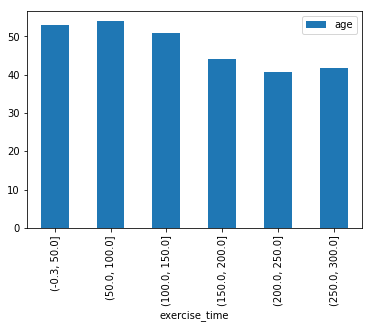

In [78]:
#bar plot table for examining age against exercise time
pt3.plot.bar()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


Assignment Questions:
1. 'Age' and 'Weight' are ordinal variables, as they can be ranked, while exercise time is a continuous variable, which can fall along a wide range of possible numbers.

2. Based on the data available, weight and exercise time seem to have the strongest correlation (as exercise time increase, weight seems to decline). Age and Weight do not seem to have any direct correlation. There is some correlation between age and exercise(younger people seem to be exercising for longer than older people.) This would indicate that age is the confunding variable in the data set.

3. There seems to be a 'real' correlation between exercise time and weight (i.e. that longer exercise times correlation with lower weights), as well as a correlation between age and exercise time. A spurious relationship is between age and weight, as per the data, there is not a consistent decrease/increase relationship between the two.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)